# Test File for MLScratchPad

## Content
* Introduction and Notification
* Regression Model
    * Linear Regression
    * Ridge Regression
* Tree-based Model
    * Decision Tree
    * Random Tree
* Ensemble Model
    * Bagging
    * InsaneLearner
    * Random Forest
* Dimension Reduction
    * PCA
* Clustering Model
    * K-means
    * Spectral
    * ISOMAP
* Reference


## Introduction and Notification
This is a testing file for testing all the models.

* Please make sure you have installed Python3.
* Please make sure you have installed library NumPy, Pandas, and matplotlib for this test file.
* Please make sure you have downloaded the data folder and all the Python files for testing.

## Regression Model

In [53]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import missingno as msno
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/imblearn/utils/_validation.py)

In [9]:

'''
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
'''
#

import matplotlib as mpl
#matplotlib.use('TkAgg')


from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/jeffreyhuang/anaconda3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py)

### Read Data

In [7]:
# Read data
df = pd.read_pickle('FV2_df.pkl')
df.to_csv('FV2_df.csv', index=False)
df

FileNotFoundError: [Errno 2] No such file or directory: 'FV2_df.pkl'

In [6]:
# Display basic statistic
print(df.describe())

NameError: name 'df' is not defined

In [5]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Columns: 143 entries, MERCHNT_IND to CUST_CATEGORY_PROPORTION
dtypes: float64(114), int64(29)
memory usage: 14.2 MB


## Missing Value

### Missing Value Table

In [6]:
# Missing value of each column
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    print(f"Your selected dataframe has {df.shape[1]} columns.\n"
          f"There are {mis_val_table_ren_columns.shape[0]} columns that have missing values.")
    print(f"Number of rows with at least one missing value: {df.isnull().any(axis=1).sum()}")

    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 143 columns.
There are 65 columns that have missing values.
Number of rows with at least one missing value: 8271


Missing Values  % of Total Values
AGE_YEAR                             7420               57.0
SMALL_BUS_IND                        7214               55.4
EE_TOT                               7198               55.3
SALE_VOL                             7198               55.3
MFR_IND                              7198               55.3
SBSID_IND                            7198               55.3
TM_ACTIVITY_CURR                     2210               17.0
FX                                   2210               17.0
ACH_CHNL_NBR                         2210               17.0
SWEEPS_NBR                           2210               17.0
WIRE_INC_NBR                         2210               17.0
WIRE_NONTM_NBR                       2210               17.0
WIRE_TM_NBR                          2210               17.0
ZBA_NBR                              2210               17.0
PURC_NBR                             2210               17.0
ACTIVE_TM_PRODUCTS                   2210               17.0
TOTAL_VOLUME                         2210               17.0
TOTAL_PXV                            2210               17.0
FRAUD                                2210               17.0
RECEIVABLES                          2210               17.0
TM_ACTIVITY_3M                       2210               17.0
SNP_NBR                              2210               17.0
PAYABLES                             2210               17.0
CASH_FLOW_OPTIMIZATION               2210               17.0
CARD                                 2210               17.0
CARD_3M                              2210               17.0
CASH_FLOW_OPTIMIZATION_3M            2210               17.0
CHANNELS_3M                          2210               17.0
FRAUD_3M                             2210               17.0
FX_3M                                2210               17.0
PAYABLES_3M                          2210               17.0
RECEIVABLES_3M                       2210               17.0
CHANNELS                             2210               17.0
SO_NBR                               2210               17.0
RDC_NBR                              2210               17.0
DEPOSITRACK_NBR                      2210               17.0
ACH_CO_NBR                           2210               17.0
ACH_DO_NBR                           2210               17.0
ACCT_RECON_NBR                       2210               17.0
BLUE_SD_NBR                          2210               17.0
BLOCKING_SERV_NBR                    2210               17.0
CHK_DP_EC_NBR                        2210               17.0
CHK_PD_ED_NBR                        2210               17.0
C_NETCASH_NBR                        2210               17.0
C_EACCESS_NBR                        2210               17.0
CASH_SERV_NBR                        2210               17.0
PAYSOURCE_NBR                        2210               17.0
CTRL_DISBURSEMENT_NBR                2210               17.0
EBPP_NBR                             2210               17.0
HCRS_NBR                             2210               17.0
PP_NBR                               2210               17.0
LOCKBOX_NBR                          2210               17.0
IMG_SERV_NBR                         2210               17.0
EDI_NBR                              2210               17.0
IMG_CSH_LTR_NBR                      2210               17.0
H2H_NBR                              2210               17.0
F_NETCASH_NBR                        2210               17.0
FX_NBR                               2210               17.0
FTS_NBR                              2210               17.0
ELOCKBOX_NBR                         2210               17.0
SNI_NBR                              2210               17.0
NEAREST_BRANCH_DISTANCE                86                0.7
NEAREST_VAULT_DISTANCE                 86                0.7
MTOTAL                                 81                0.6
MERCLOCATION                           81                0.6

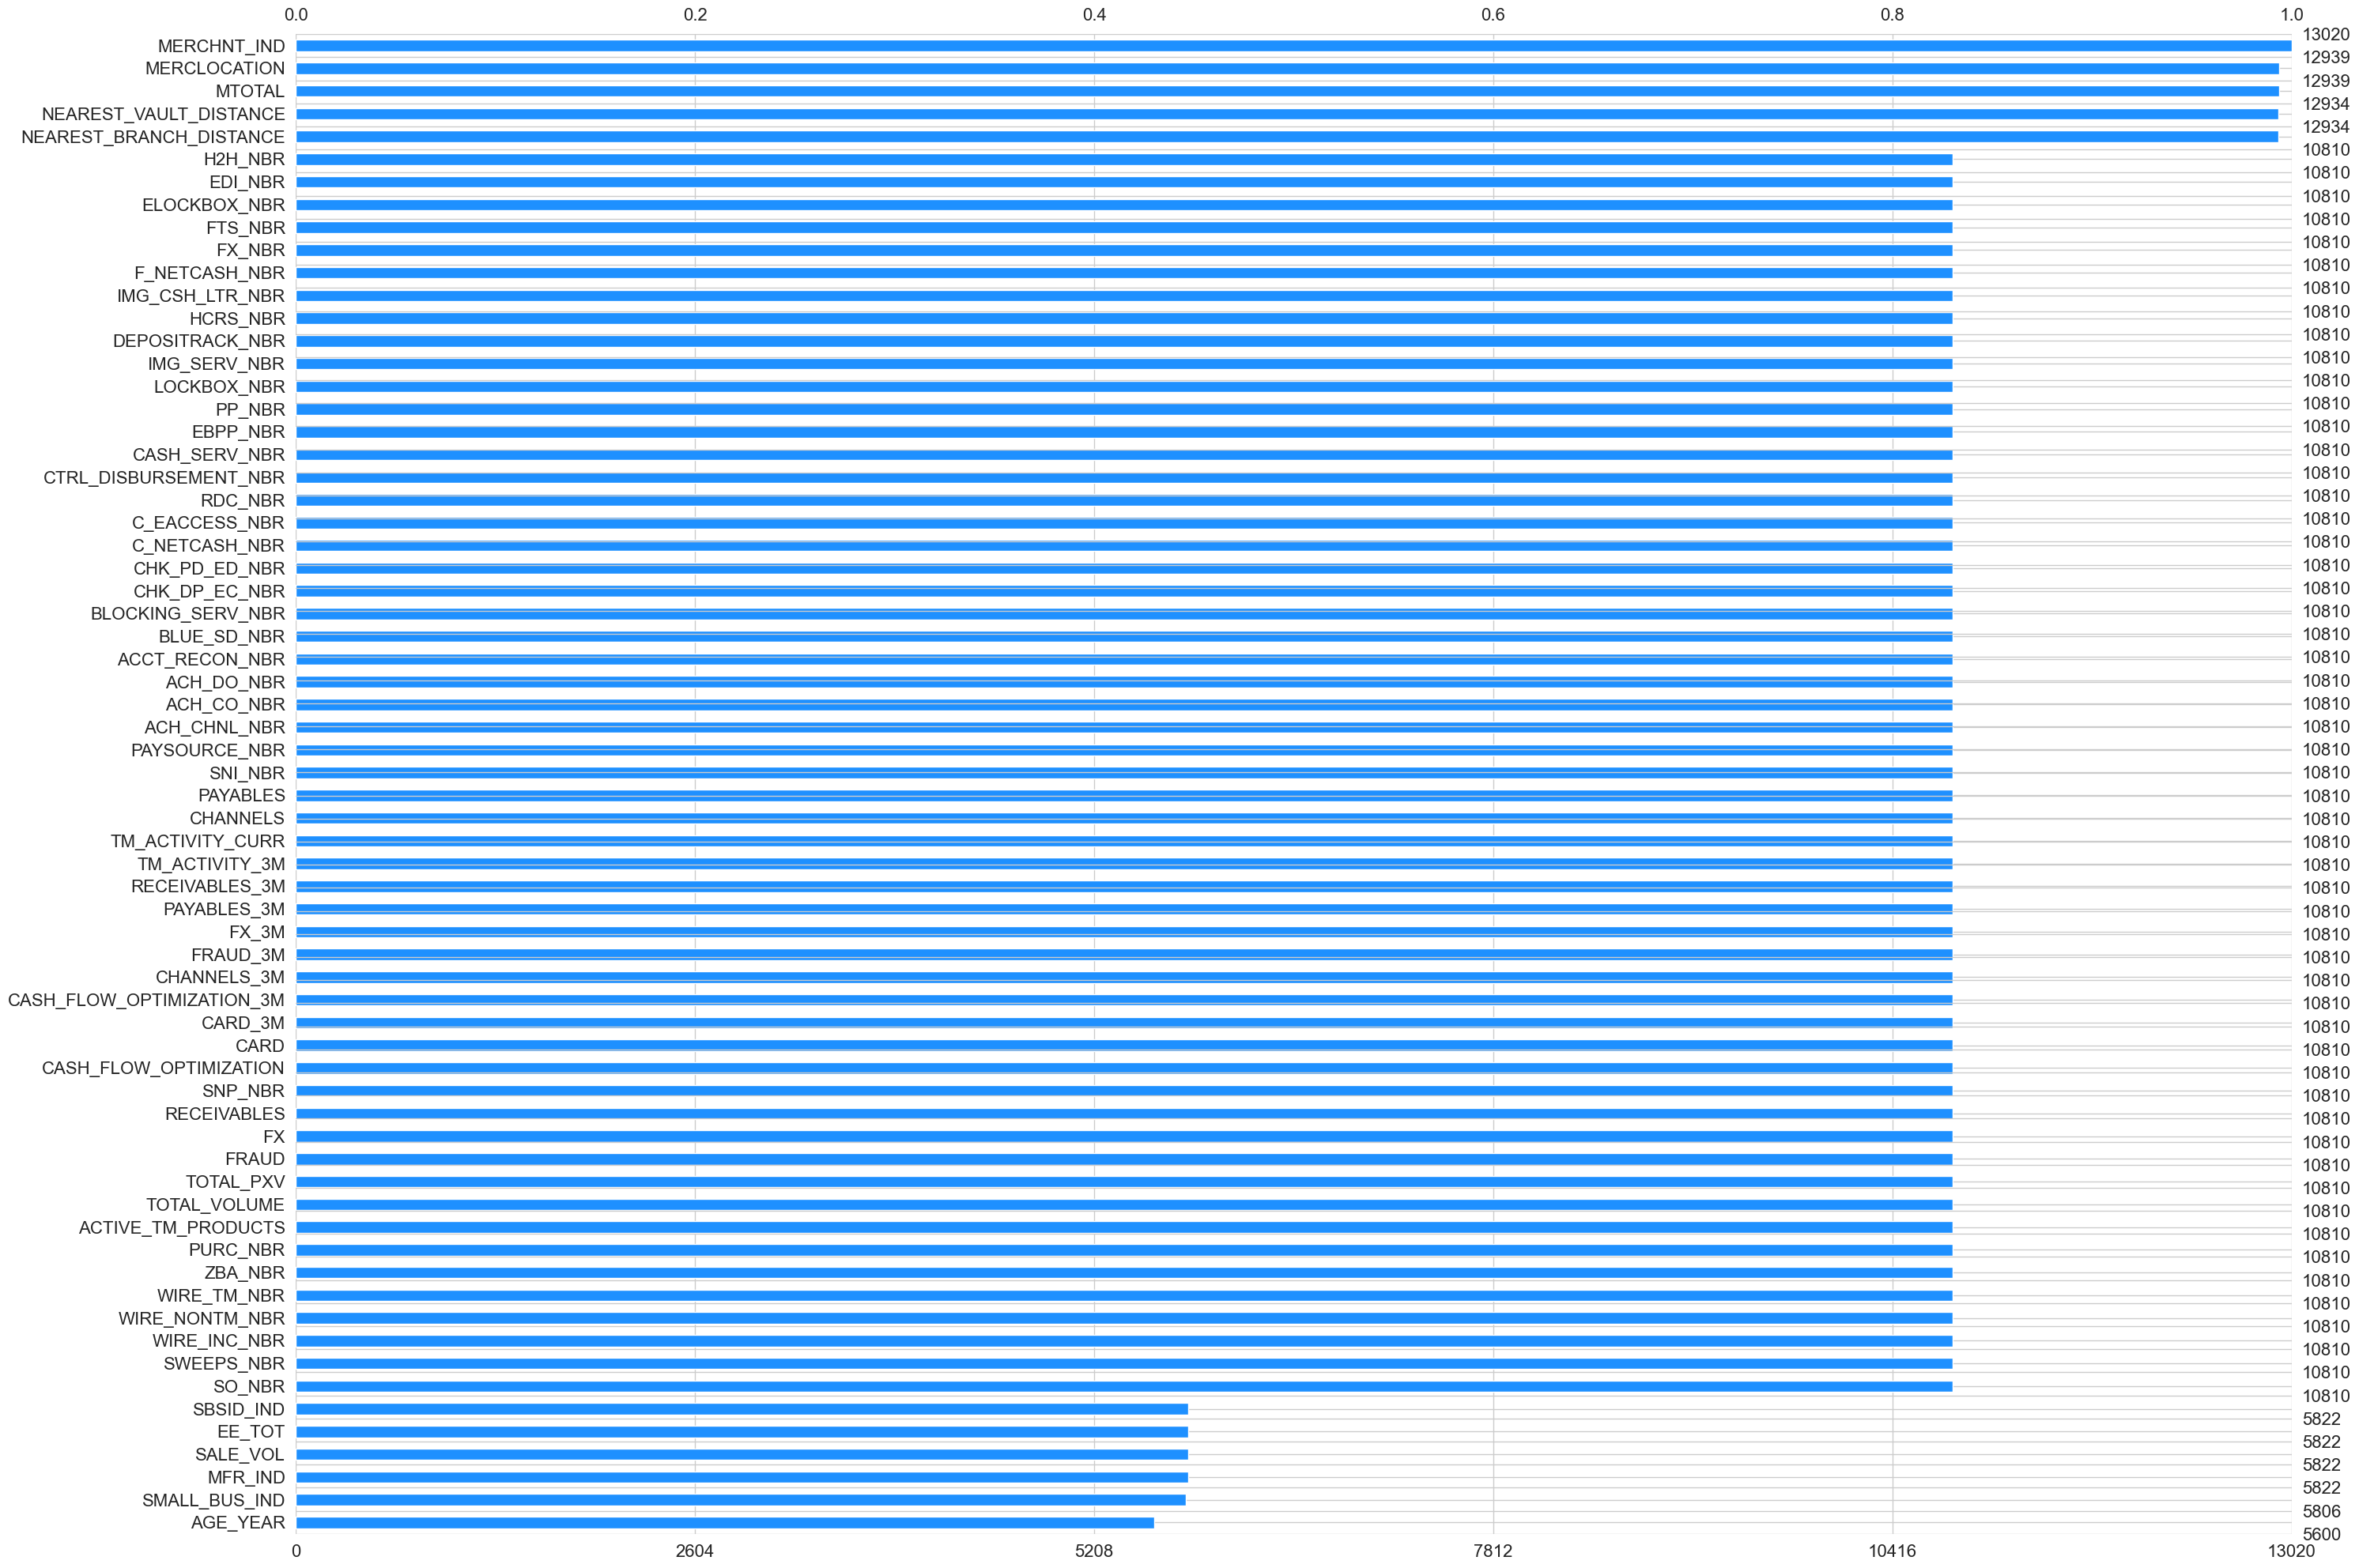

In [7]:
# Filter the DataFrame to include only columns with missing values
missing_value_columns = df.columns[df.isnull().any()]
df_missing = df[missing_value_columns].copy()
df_missing['MERCHNT_IND'] = df['MERCHNT_IND']

# Create Missing Value Bar
plt.figure(figsize=(30, 20), facecolor='white')
msno.bar(df_missing, color="dodgerblue", sort="ascending", figsize=(30,20))
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig('img/missing_values_bar.png')
#plt.close()

<Figure size 3000x2000 with 0 Axes>

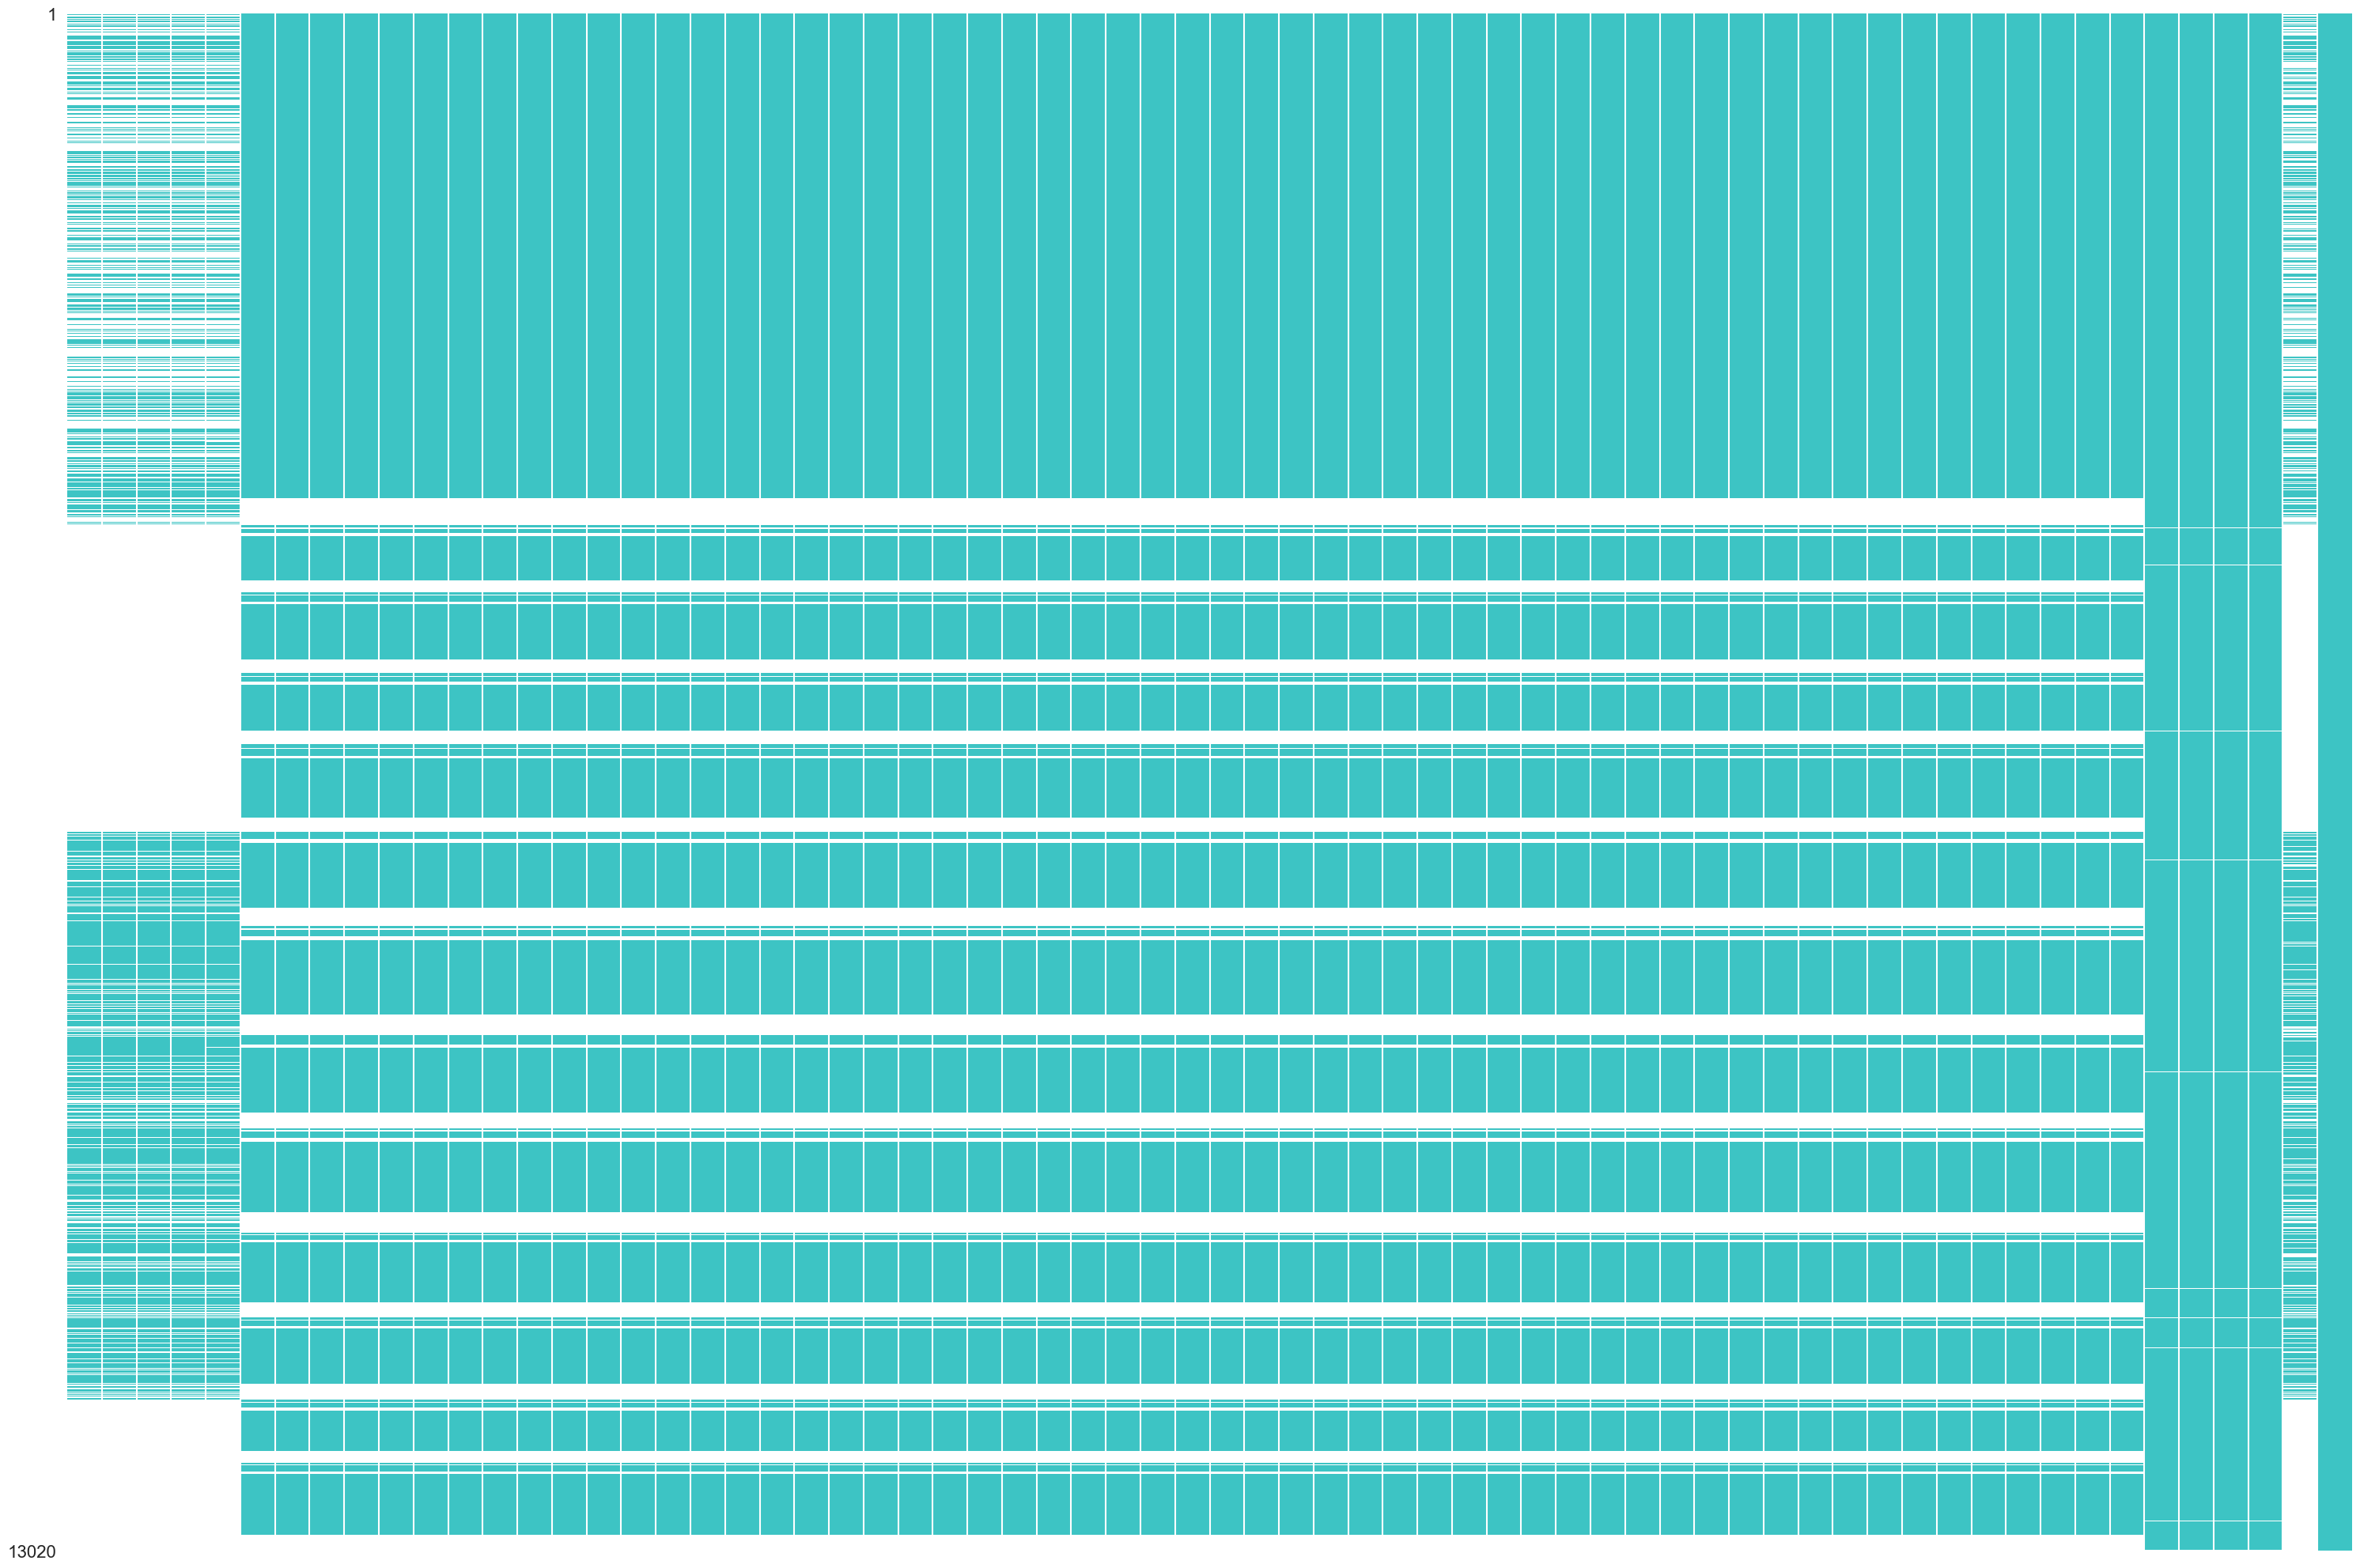

In [8]:
#Create Missing Value Matrix
plt.figure(figsize=(30, 20), facecolor='white')
msno.matrix(df_missing, figsize=(30, 20), sparkline=False, fontsize=10, color=(0.24, 0.77, 0.77))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('img/missing_values_matrix.png')
#plt.close()

<Figure size 3000x2000 with 0 Axes>

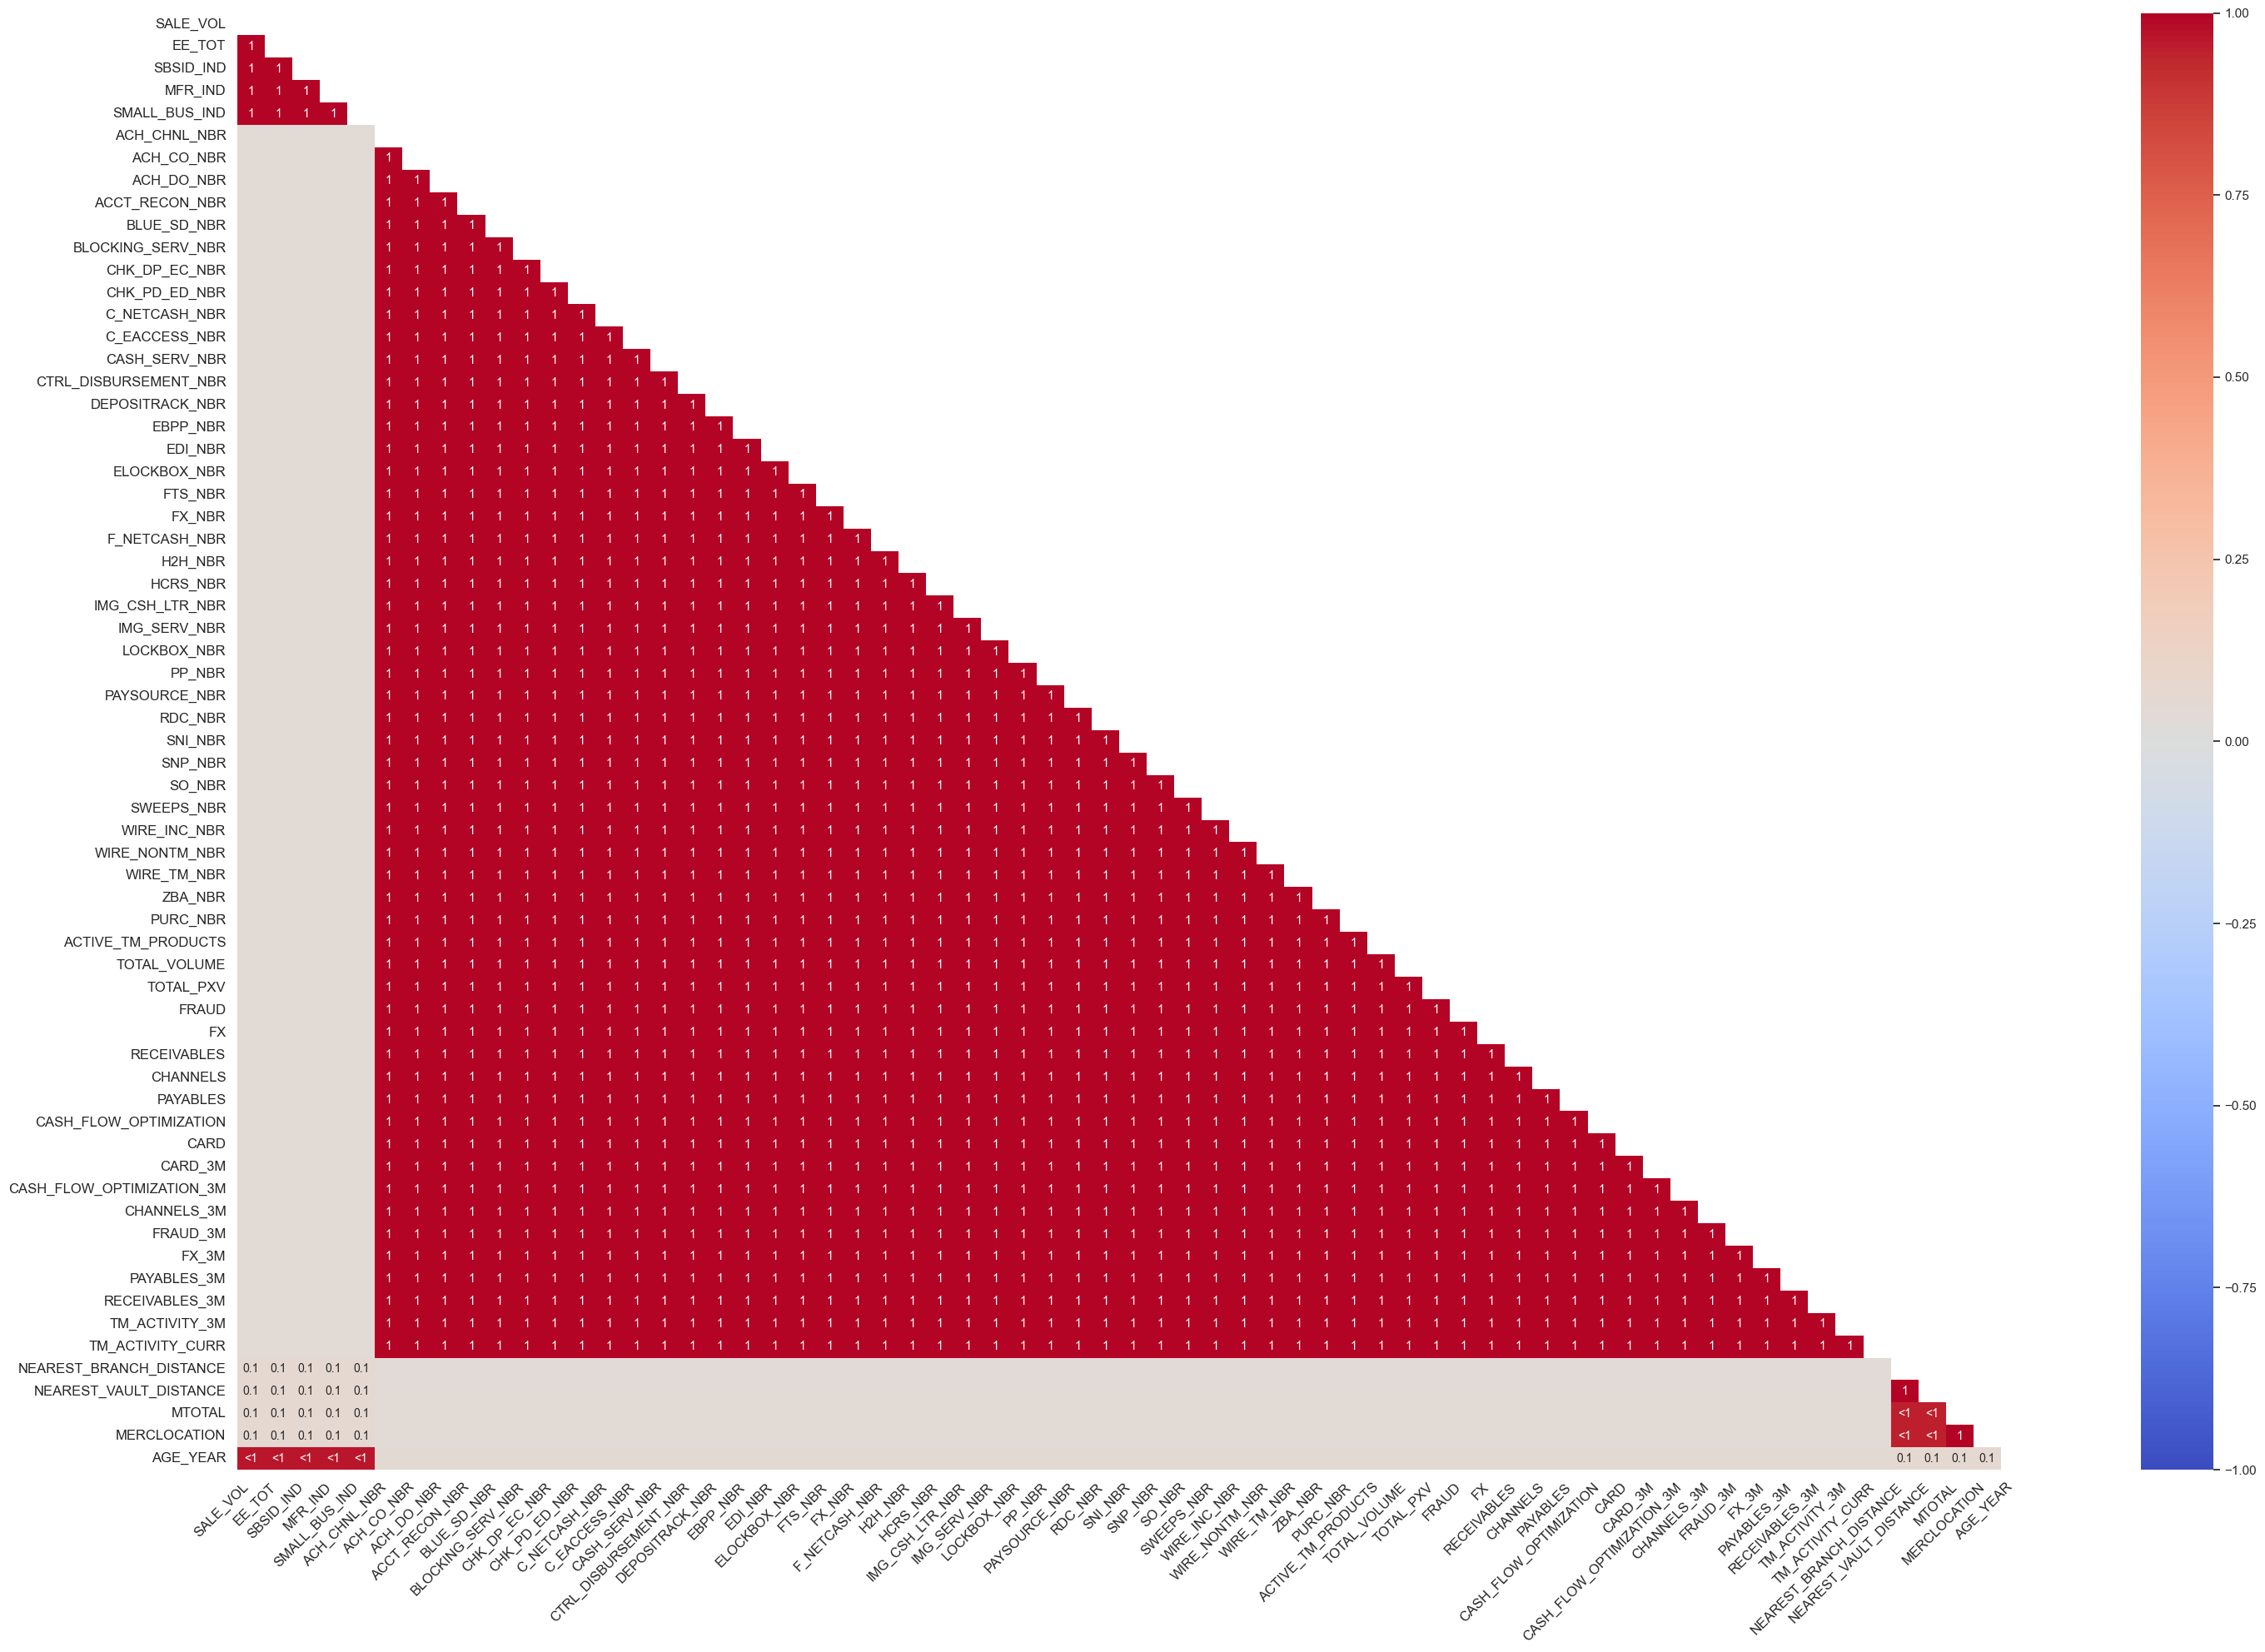

In [9]:
# Create Missing Value Heatmap
plt.figure(figsize=(30, 20), facecolor='white')  # Set the figure background to white
msno.heatmap(df_missing, figsize=(30, 20), fontsize=12, cmap='coolwarm')
plt.tight_layout()  # Adjust layout to fit everything
plt.savefig('img/missing_values_heatmap.png')  # Save the figure to a file
#plt.close()

### Add Binary Columns for Missing Data Indicators

In [3]:
# Add binary columns indicating missingness of features
df_mis = df.copy()
seen_patterns = []
for column in df.columns:
    if df[column].isnull().sum() > 0:
        pattern = df[column].isnull().astype(int)
        pattern_key = tuple(pattern)
        if pattern_key not in seen_patterns:
            seen_patterns.append(pattern_key)
            df_mis[column + '_MISS'] = pattern
len(seen_patterns)

6

In [6]:
df_mis.iloc[:, -7:]

CUST_CATEGORY_PROPORTION  SALE_VOL_MISS  SMALL_BUS_IND_MISS  \
0                      0.168934              1                   1   
1                      0.168934              1                   1   
2                      0.168934              0                   0   
3                      0.168934              0                   0   
4                      0.168934              0                   0   
5                      0.168934              0                   0   
6                      0.070100              0                   0   
7                      0.070100              0                   0   
8                      0.117625              0                   0   
9                      0.117625              0                   0   
10                     0.070100              1                   1   
11                     0.070100              1                   1   
12                     0.070100              1                   1   
13                     0.070100              1                   1   
14                     0.070100              1                   1   
15                     0.070100              1                   1   
16                     0.070100              0                   0   
17                     0.070100              1                   1   
18                     0.070100              1                   1   
19                     0.070100              1                   1   
20                     0.070100              1                   1   
21                     0.117625              1                   1   
22                     0.117625              1                   1   
23                     0.117625              1                   1   
24                     0.117625              1                   1   
25                     0.117625              1                   1   
26                     0.168934              1                   1   
27                     0.168934              1                   1   
28                     0.168934              1                   1   
29                     0.168934              1                   1   
30                     0.168934              1                   1   
31                     0.168934              0                   0   
32                     0.117625              0                   0   
33                     0.117625              0                   0   
34                     0.117625              0                   0   
35                     0.117625              0                   0   
36                     0.117625              0                   0   
37                     0.117625              0                   0   
38                     0.070100              0                   0   
39                     0.070100              0                   0   
40                     0.070100              0                   0   
41                     0.070100              0                   0   
42                     0.070100              0                   0   
43                     0.070100              0                   0   
44                     0.070100              0                   0   
45                     0.070100              0                   0   
46                     0.070100              0                   0   
47                     0.070100              0                   0   
48                     0.070100              1                   1   
49                     0.070100              1                   1   
50                     0.070100              1                   1   
51                     0.070100              1                   1   
52                     0.070100              1                   1   
53                     0.070100              0                   0   
54                     0.070100              0                   0   
55                     0.070100              0                   0   
56               

In [7]:
def regression_impute_missing_values(df):
    missing_features = df.columns[df.isna().any()].tolist()
    non_missing_features = df.columns[df.notna().all()].tolist()

    for mf in missing_features:
        print(mf)
        train_data = df[df[mf].notna()]
        test_data = df[df[mf].isna()]
        y_train = train_data[mf]
        X_train = train_data[non_missing_features]
        X_test = test_data[non_missing_features]

        rf = RandomForestRegressor(n_estimators=100)
        rf.fit(X_train, y_train)
        importances = rf.feature_importances_
        important_indices = sorted(range(len(importances)), key=lambda i: importances[i])[-5:]
        print(important_indices)

        X_train_new = X_train.iloc[:, important_indices]
        X_test_new = X_test.iloc[:, important_indices]

        poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
        poly_reg.fit(X_train_new, y_train)

        df.loc[df[mf].isna(), mf] = poly_reg.predict(X_test_new)

    return df

df_imputed = regression_impute_missing_values(df_mis)
df_imputed.to_csv('FV2_df_imputed.csv', index=False)
print("Done!")

CHK_DP_EC_NBR
[19, 2, 5, 27, 3]
CHK_PD_ED_NBR
[18, 28, 5, 27, 2]
C_NETCASH_NBR
[5, 18, 17, 8, 28]
C_EACCESS_NBR
[18, 8, 24, 28, 26]
CASH_SERV_NBR
[18, 5, 86, 33, 26]
CTRL_DISBURSEMENT_NBR
[5, 24, 20, 23, 8]
DEPOSITRACK_NBR
[1, 87, 5, 3, 19]
EBPP_NBR
[90, 91, 92, 93, 94]
EDI_NBR
[55, 4, 17, 2, 18]
ELOCKBOX_NBR
[90, 91, 92, 93, 94]
FTS_NBR
[18, 22, 19, 5, 28]
FX_NBR
[18, 55, 86, 20, 17]
F_NETCASH_NBR
[3, 87, 19, 28, 5]
H2H_NBR
[2, 39, 86, 4, 23]
HCRS_NBR
[55, 17, 27, 4, 18]
IMG_CSH_LTR_NBR
[22, 5, 3, 28, 10]
IMG_SERV_NBR
[28, 20, 23, 7, 24]
LOCKBOX_NBR
[18, 17, 3, 8, 5]
PP_NBR
[8, 5, 18, 24, 28]
PAYSOURCE_NBR
[90, 3, 24, 5, 23]
RDC_NBR
[87, 10, 8, 26, 86]
SNI_NBR
[21, 3, 28, 90, 8]
SNP_NBR
[24, 28, 17, 26, 18]
SO_NBR
[1, 87, 88, 5, 28]
SWEEPS_NBR
[23, 4, 3, 5, 8]
WIRE_INC_NBR
[56, 87, 18, 5, 28]
WIRE_NONTM_NBR
[86, 22, 21, 17, 10]
WIRE_TM_NBR
[24, 86, 27, 18, 28]
ZBA_NBR
[23, 86, 25, 24, 8]
PURC_NBR
[4, 27, 3, 24, 8]
ACTIVE_TM_PRODUCTS
[17, 3, 5, 27, 24]
TOTAL_VOLUME
[5, 86, 26, 2, 27]
T

In [8]:
# Missing Value Detection
print("Missing values for each column:")
print(df_imputed.isnull().sum())
print()

Missing values for each column:
MERCHNT_IND                     0
TRAIN_TEST                      0
BBVA_ACCT_CNT                   0
TOTAL_DEPOSIT_BAL               0
TOTAL_LOAN_BAL                  0
BUS_CHKG_BAL                    0
BUS_CHKG_IND                    0
BUS_CR_CARD_IND                 0
BUS_CR_CARD_BAL                 0
BUS_MONEY_MKT_IND               0
BUS_MONEY_MKT_BAL               0
BUS_SVNGS_IND                   0
BUS_SVNGS_BAL                   0
DIR_DEP_IND                     0
DIGITAL_ACTV_90DAY              0
MOBILE_ACTV_90DAY               0
BILLPAY_ACTV_90DAY              0
TENURE                          0
SALE_VOL                        0
EE_TOT                          0
SBSID_IND                       0
MFR_IND                         0
SMALL_BUS_IND                   0
ACH_CHNL_NBR                    0
ACH_CO_NBR                      0
ACH_DO_NBR                      0
ACCT_RECON_NBR                  0
BLUE_SD_NBR                     0
BLOCKING_SERV_NB

In [9]:
# Check for duplicates
df_imputed.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('FV2_df_imputed.csv')
df

NameError: name 'pd' is not defined

### Understand Target Value

In [9]:
count_zeros = sum(df['MERCHNT_IND'] == 0)
count_ones = sum(df['MERCHNT_IND'] == 1)
print(f"The number of rows where MERCHNT_IND is '0': {count_zeros} which is {round(100*count_zeros/df.shape[0],2)}%")
print(f"The number of rows where MERCHNT_IND is '1': {count_ones} which is {round(100*count_ones/df.shape[0],2)}%")
print()

The number of rows where MERCHNT_IND is '0': 8680 which is 66.67%
The number of rows where MERCHNT_IND is '1': 4340 which is 33.33%



In [10]:
count_zeros = sum(df['TRAIN_TEST'] == 0)
count_ones = sum(df['TRAIN_TEST'] == 1)
print(f"The number of rows where TRAIN_TEST is '0': {count_zeros} which is {round(100*count_zeros/df.shape[0],2)}%")
print(f"The number of rows where TRAIN_TEST is '1': {count_ones} which is {round(100*count_ones/df.shape[0],2)}%")
print()

The number of rows where TRAIN_TEST is '0': 3981 which is 30.58%
The number of rows where TRAIN_TEST is '1': 9039 which is 69.42%



### Standardize Data and Feature Selection

In [11]:
X = df.drop(['MERCHNT_IND', 'TRAIN_TEST'], axis=1)
y = df['MERCHNT_IND']
TT = df['TRAIN_TEST']

scaler = StandardScaler()
V_stand = scaler.fit_transform(X)
X_stand = pd.DataFrame(V_stand, columns=X.columns, index=df.index)
alphas = np.logspace(-4, 0, 100)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000).fit(X_stand, y)
selected_features = X_stand.columns[(lasso.coef_ != 0)]

print('Total Features: ', len(selected_features))
print('Selected Features: ', selected_features)
X_select = X_stand[selected_features]
print(X_select.head())

Total Features:  16
Selected Features:  Index(['BBVA_ACCT_CNT', 'BUS_CR_CARD_IND', 'MOBILE_ACTV_90DAY', 'TENURE',
       'RECEIVABLES', 'RECEIVABLES_3M', 'TM_ACTIVITY_3M',
       'INDUSTRY_TOP_PERCENTAGE', 'NAICS_TOP_PERCENTAGE',
       'NAICS_BOTTOM_PERCENTAGE', 'CITIZEN', 'US_BUSINESS', 'CO', 'ACH_TRANS',
       'NPROPORTION', 'ACH_CHNL_NBR_MISS'],
      dtype='object')
   BBVA_ACCT_CNT  BUS_CR_CARD_IND  MOBILE_ACTV_90DAY    TENURE  RECEIVABLES  \
0      -0.393873        -0.312446          -1.044620  3.908795    -0.634998   
1      -0.393873        -0.312446          -1.044620  3.919502    -1.955124   
2      -0.393873        -0.312446           0.957286  3.930209    -0.634998   
3      -0.393873        -0.312446           0.957286  3.939880    -0.634998   
4      -0.393873        -0.312446           0.957286  3.950587     0.685128   

   RECEIVABLES_3M  TM_ACTIVITY_3M  INDUSTRY_TOP_PERCENTAGE  \
0       -1.626345       -0.893560                -0.459279   
1       -1.626345       -0

In [149]:
X = df.drop(['MERCHNT_IND', 'TRAIN_TEST'], axis=1)
y = df['MERCHNT_IND']
TT = df['TRAIN_TEST']

scaler = StandardScaler()
V_stand = scaler.fit_transform(X)
X_stand = pd.DataFrame(V_stand, columns=X.columns, index=df.index)
lasso = Lasso(alpha=0.01)
lasso.fit(X_stand, y)
selected_features = [feature for feature, coef in zip(X_stand.columns, lasso.coef_) if coef != 0]

print('Total Features: ', len(selected_features))
print('Selected Features: ', selected_features)
X_select = X_stand[selected_features]
print(X_select.head())

Total Features:  31
Selected Features:  ['BBVA_ACCT_CNT', 'BUS_CR_CARD_IND', 'BUS_SVNGS_BAL', 'DIR_DEP_IND', 'MOBILE_ACTV_90DAY', 'BILLPAY_ACTV_90DAY', 'TENURE', 'PURC_NBR', 'RECEIVABLES', 'RECEIVABLES_3M', 'TM_ACTIVITY_3M', 'TM_ACTIVITY_CURR', 'INDUSTRY_TOP_PERCENTAGE', 'NAICS_TOP_PERCENTAGE', 'NAICS_BOTTOM_PERCENTAGE', 'CITIZEN', 'US_BUSINESS', 'STATE_PROPORTION', 'CO', 'FL', 'OTHER_STATES', 'DBT_CARD_ACTV_90DAY', 'CROSS_SELL', 'BUS_LOANS_IND', 'MTGE_IND', 'MTGE_BAL', 'OVRDFT_LOC_IND', 'ACH_TRANS', 'NPROPORTION', 'IIPROPORTION', 'ACH_CHNL_NBR_MISS']
   BBVA_ACCT_CNT  BUS_CR_CARD_IND  BUS_SVNGS_BAL  DIR_DEP_IND  \
0      -0.393873        -0.312446      -0.068011    -0.204369   
1      -0.393873        -0.312446      -0.068011    -0.204369   
2      -0.393873        -0.312446      -0.068011    -0.204369   
3      -0.393873        -0.312446      -0.068011    -0.204369   
4      -0.393873        -0.312446      -0.068011    -0.204369   

   MOBILE_ACTV_90DAY  BILLPAY_ACTV_90DAY    TENURE 

### Correlation Heat Map

MERCHNT_IND                1.000000
US_BUSINESS                0.216009
RECEIVABLES                0.196160
MOBILE_ACTV_90DAY          0.189611
RECEIVABLES_3M             0.176437
INDUSTRY_TOP_PERCENTAGE    0.160232
NAICS_TOP_PERCENTAGE       0.153895
NPROPORTION                0.148915
TM_ACTIVITY_3M             0.123680
TM_ACTIVITY_CURR           0.118648
ACH_TRANS                  0.095771
BBVA_ACCT_CNT              0.084542
BUS_CR_CARD_IND            0.082421
CROSS_SELL                 0.063138
OVRDFT_LOC_IND             0.050404
FL                         0.046721
STATE_PROPORTION           0.036194
BUS_SVNGS_BAL              0.033724
PURC_NBR                   0.027164
BUS_LOANS_IND              0.015089
BILLPAY_ACTV_90DAY        -0.002867
MTGE_BAL                  -0.031887
IIPROPORTION              -0.047475
MTGE_IND                  -0.048597
OTHER_STATES              -0.048615
DIR_DEP_IND               -0.052323
CO                        -0.053933
NAICS_BOTTOM_PERCENTAGE   -0

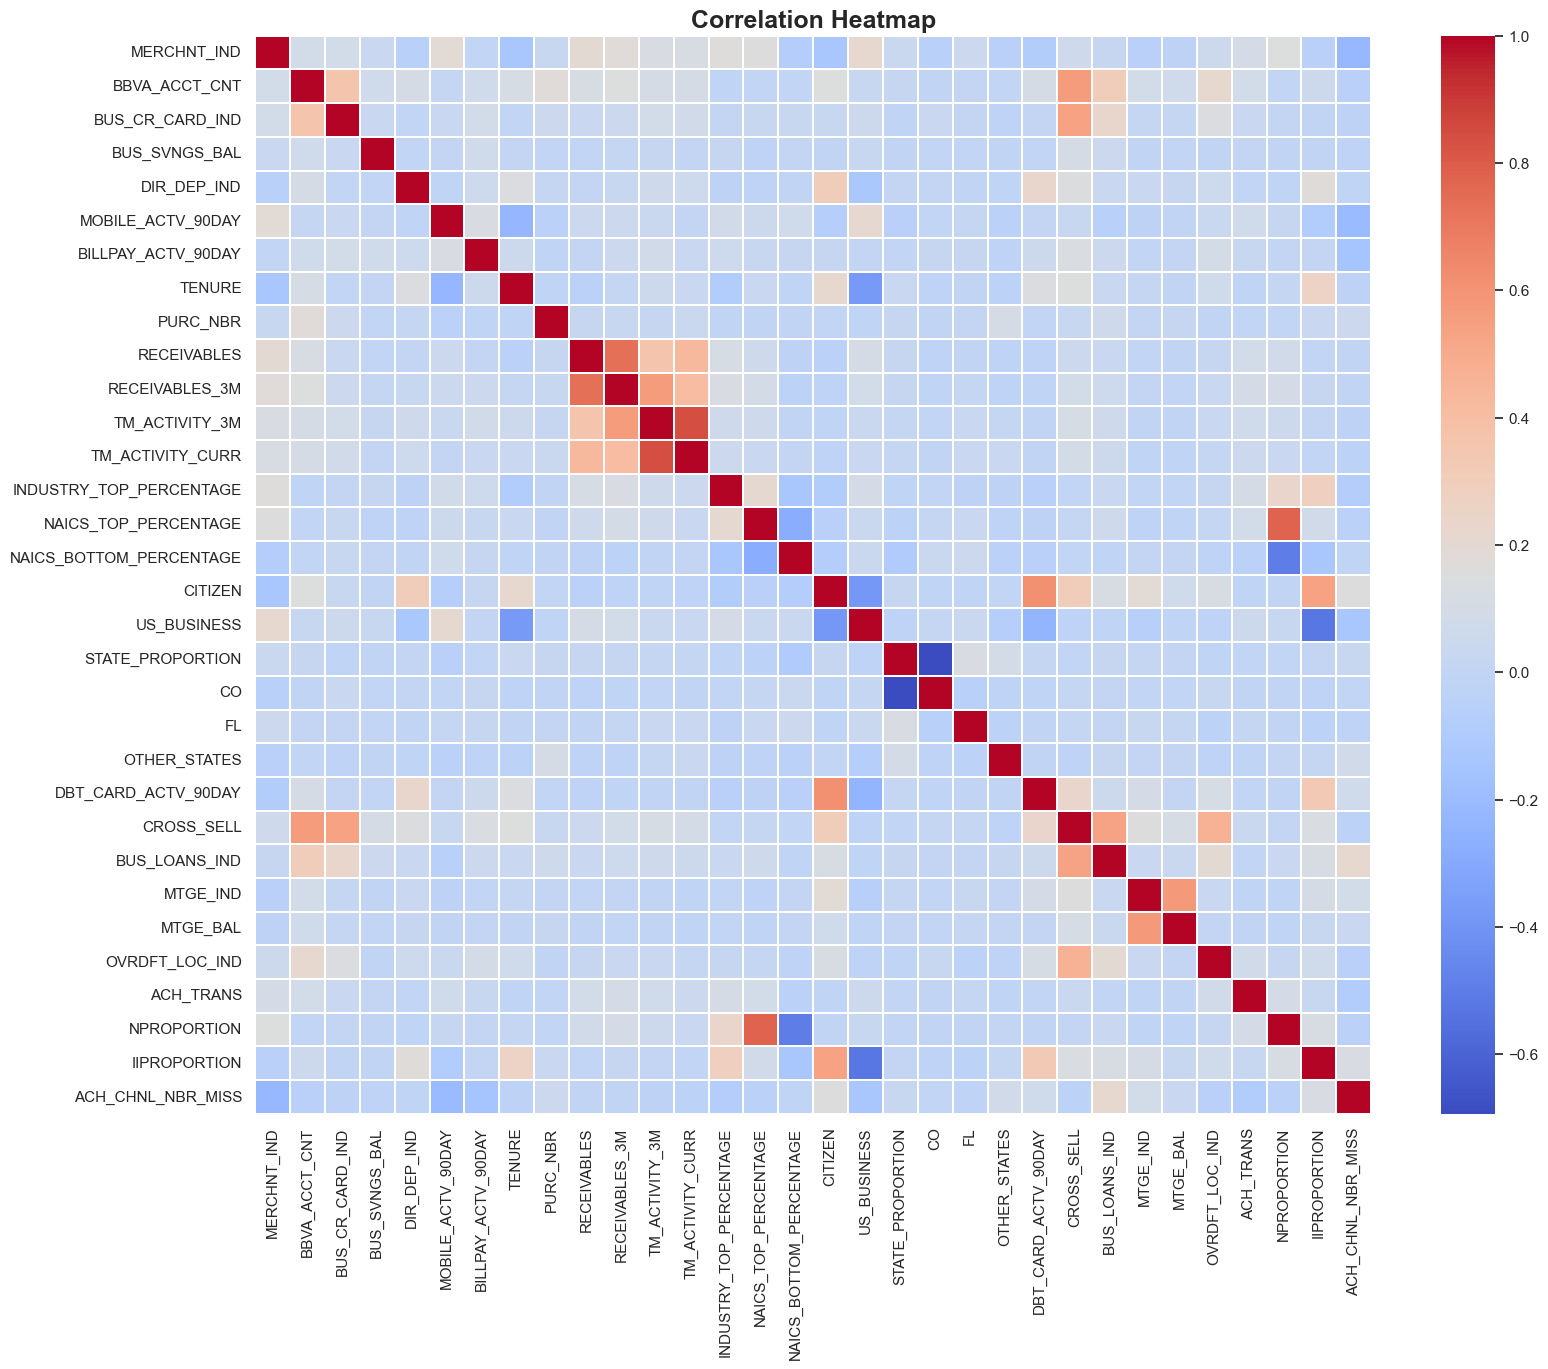

In [150]:
yX_select = pd.concat([y, X_select], axis=1)
plt.figure(figsize=(18, 14))
sns.heatmap(yX_select.corr(), annot=False, linewidths=0.03, cmap='coolwarm')
plt.title('Correlation Heatmap', size=18, fontweight="bold")
plt.savefig('img/heatmap.png')
#plt.close()

corr_matrix = yX_select.corr()
print(corr_matrix['MERCHNT_IND'].sort_values(ascending=False))
print()

## Training

### Train Test Split

In [12]:
# Splitting the data into training and testing sets based on 'TRAIN_TEST'
X_train = X_select[TT == 1]
y_train = y[TT == 1]
X_test = X_select[TT == 0]
y_test = y[TT == 0]
results = []

### Balance Train Set

In [13]:
# Count the occurrences of each value in y_train
value_counts = y_train.value_counts()
print("Number of 1s in y_train:", value_counts[1])
print("Number of 0s in y_train:", value_counts[0])

Number of 1s in y_train: 2910
Number of 0s in y_train: 6129


In [16]:
# Applying SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
value_counts = y_train_smote.value_counts()
print("Number of 1s in y_train:", value_counts[1])
print("Number of 0s in y_train:", value_counts[0])

Number of 1s in y_train: 6129
Number of 0s in y_train: 6129


In [17]:
# Applying Random Under Sampling to the training set
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
value_counts = y_train_under.value_counts()
print("Number of 1s in y_train:", value_counts[1])
print("Number of 0s in y_train:", value_counts[0])

Number of 1s in y_train: 2910
Number of 0s in y_train: 2910


In [63]:
def train_and_evaluate_model(estimator, param_grid, X_train, y_train, X_test, y_test, model_name):
    print(f"Training {model_name}")

    auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

    grid = GridSearchCV(estimator=estimator,
                        param_grid=param_grid,
                        cv=5,
                        verbose=2,
                        scoring=auc_scorer)

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Best CV AUC score: {grid.best_score_}")

    best_model.fit(X_train, y_train)

    train_probabilities = best_model.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, train_probabilities)

    test_probabilities = best_model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, test_probabilities)

    fpr, tpr, _ = roc_curve(y_test, test_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.savefig(f'ROC_{model_name}')
    #plt.show()
    plt.close()

    return pd.DataFrame({
        'Model Name': [model_name],
        'CV AUC': [grid.best_score_],
        'Train AUC': [auc_train],
        'Test AUC': [auc_test]
    }), best_model


records = pd.DataFrame(columns=['Model Name', 'CV AUC', 'Train AUC', 'Test AUC'])
print(records)

Empty DataFrame
Columns: [Model Name, CV AUC, Train AUC, Test AUC]
Index: []


### Random Forest

In [64]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4, 8]
}

# Best Record
param_grid = {
    'n_estimators': [600],
    'min_samples_split': [2],
    'min_samples_leaf': [18]
}

record, best_rf = train_and_evaluate_model(RandomForestClassifier(random_state=42),
                                      param_grid,
                                      X_train_under,
                                      y_train_under,
                                      X_test,
                                      y_test,
                                      "Random Forest")

records = pd.concat([records, record], ignore_index=True)
#records = records.append(record, ignore_index=True)
print(records)

Training Random Forest
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END min_samples_leaf=18, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END min_samples_leaf=18, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END min_samples_leaf=18, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END min_samples_leaf=18, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END min_samples_leaf=18, min_samples_split=2, n_estimators=600; total time=   1.5s
Best hyperparameters: {'min_samples_leaf': 18, 'min_samples_split': 2, 'n_estimators': 600}
Best CV AUC score: 0.5889780470235355
      Model Name    CV AUC  Train AUC  Test AUC
0  Random Forest  0.588978   0.839978  0.773367


### Gradient Boosting

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 3]
}
# Best Record
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [3]
}
record, best_gb = train_and_evaluate_model(GradientBoostingClassifier(random_state=42),
                                      param_grid,
                                      X_train_under,
                                      y_train_under,
                                      X_test,
                                      y_test,
                                      "Gradient Boosting")
records = pd.concat([records, record], ignore_index=True)
print(records)

Training Gradient Boosting
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   1.2s
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best CV AUC score: 0.5314208618226048
          Model Name    CV AUC  Train AUC  Test AUC
0      Random Forest  0.588978   0.839978  0.773367
1  Gradient Boosting  0.531421   0.841219 

### AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
# Parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 1]
}
# Best Record
param_grid_adaboost = {
    'n_estimators': [100],
    'learning_rate': [0.1]
}
# Train and evaluate AdaBoost model
record, best_ada = train_and_evaluate_model(AdaBoostClassifier(random_state=42),
                                           param_grid_adaboost,
                                           X_train_under,
                                           y_train_under,
                                           X_test,
                                           y_test,
                                           "AdaBoost")

records = pd.concat([records, record], ignore_index=True)
print(records)

Training AdaBoost
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.6s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.5s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best CV AUC score: 0.6261744074821979
          Model Name    CV AUC  Train AUC  Test AUC
0      Random Forest  0.588978   0.839978  0.773367
1  Gradient Boosting  0.531421   0.841219  0.772027
2           AdaBoost  0.626174   0.774165  0.774016


In [68]:
from itertools import combinations
from sklearn.metrics import roc_curve

def ensemble_models(models, model_names, X_train, y_train, X_test, y_test, records):
    train_preds = [model.predict_proba(X_train)[:, 1] for model in models]
    test_preds = [model.predict_proba(X_test)[:, 1] for model in models]

    stacked_train = np.column_stack(train_preds)
    stacked_test = np.column_stack(test_preds)

    meta_model = LogisticRegression()
    meta_model.fit(stacked_train, y_train)

    ensemble_train_auc = roc_auc_score(y_train, meta_model.predict_proba(stacked_train)[:, 1])
    ensemble_test_auc = roc_auc_score(y_test, meta_model.predict_proba(stacked_test)[:, 1])

    fpr, tpr, _ = roc_curve(y_test, meta_model.predict_proba(stacked_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {ensemble_test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ensemble_title = f'{" + ".join(model_names)}'
    plt.title(f'ROC Curve for {ensemble_title}')
    plt.legend(loc="lower right")
    plt.savefig(f'ROC_{ensemble_title.replace(" ", "_")}')
    plt.close()

    ensemble_record = pd.DataFrame({
        'Model Name': [ensemble_title],
        'CV AUC': [None],
        'Train AUC': [ensemble_train_auc],
        'Test AUC': [ensemble_test_auc]
    })

    return pd.concat([records, ensemble_record], ignore_index=True)

model_list = [best_rf, best_gb, best_ada]
model_names = ["RF", "GB", "AdaB"]

for combo in combinations(range(len(model_list)), 2):
    models = [model_list[i] for i in combo]
    names = [model_names[i] for i in combo]
    records = ensemble_models(models, names, X_train_under, y_train_under, X_test, y_test, records)

records = ensemble_models(model_list, model_names, X_train_under, y_train_under, X_test, y_test, records)

print(records)

          Model Name    CV AUC  Train AUC  Test AUC
0      Random Forest  0.588978   0.839978  0.773367
1  Gradient Boosting  0.531421   0.841219  0.772027
2           AdaBoost  0.626174   0.774165  0.774016
3            RF + GB       NaN   0.845406  0.776413
4          RF + AdaB       NaN   0.841490  0.772559
5          GB + AdaB       NaN   0.842741  0.771171
6     RF + GB + AdaB       NaN   0.847958  0.775682


## Feature Selection Part 2

In [75]:
def get_aggregated_feature_importances(models, X):

    aggregated_importances = np.zeros(X.shape[1])

    for model in models:
        aggregated_importances += model.feature_importances_

    aggregated_importances /= len(models)

    return aggregated_importances

# Aggregate feature importances
importances = get_aggregated_feature_importances([best_rf, best_gb], X_train_under)

def display_feature_importances(importances, feature_names):
    feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    for name, importance in feature_importances:
        print(f"Feature: {name}, Importance: {importance}")

display_feature_importances(importances, X_train_under.columns)

Feature: TM_ACTIVITY_3M, Importance: 0.19484779292311016
Feature: TENURE, Importance: 0.16984252507751602
Feature: US_BUSINESS, Importance: 0.10826782904142601
Feature: NPROPORTION, Importance: 0.10426440863247481
Feature: RECEIVABLES, Importance: 0.10168772263985934
Feature: ACH_TRANS, Importance: 0.07075401083121641
Feature: INDUSTRY_TOP_PERCENTAGE, Importance: 0.05239772281673041
Feature: MOBILE_ACTV_90DAY, Importance: 0.04173072022531328
Feature: ACH_CHNL_NBR_MISS, Importance: 0.037482473061120375
Feature: RECEIVABLES_3M, Importance: 0.030645904909168745
Feature: BBVA_ACCT_CNT, Importance: 0.025067473631450926
Feature: CITIZEN, Importance: 0.014821014843305766
Feature: BUS_CR_CARD_IND, Importance: 0.014474331953105553
Feature: NAICS_TOP_PERCENTAGE, Importance: 0.013939750960815686
Feature: CO, Importance: 0.010693543667632793
Feature: NAICS_BOTTOM_PERCENTAGE, Importance: 0.009082774785753724


In [76]:
def iterative_feature_removal(models, X_train, y_train, X_test, y_test, importances, records):
    feature_names = X_train.columns.tolist()
    current_features = feature_names.copy()

    for i in range(len(feature_names)):
        X_train_reduced = X_train[current_features]
        X_test_reduced = X_test[current_features]

        ensemble_record = ensemble_models(models, ["RF", "GB"],
                                          X_train_reduced, y_train,
                                          X_test_reduced, y_test,
                                          pd.DataFrame(columns=['Model Name', 'CV AUC', 'Train AUC', 'Test AUC']))

        # Add record to the records DataFrame
        records = pd.concat([records, ensemble_record], ignore_index=True)

        # Remove the least important feature
        least_important_feature = current_features[np.argmin(importances[current_features])]
        current_features.remove(least_important_feature)

        # Update importances to exclude the removed feature
        importances = importances[current_features]

    return records

# Run iterative feature removal
new_records = iterative_feature_removal([best_rf, best_gb], X_train_under, y_train_under, X_test, y_test, importances, records)

# Display updated records
print(new_records)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [77]:
def iterative_feature_removal(models, X_train, y_train, X_test, y_test, importances, records, feature_names):
    current_features = feature_names.copy()

    for i in range(len(feature_names)):
        X_train_reduced = X_train[current_features]
        X_test_reduced = X_test[current_features]

        ensemble_record = ensemble_models(models, ["RF", "GB"],
                                          X_train_reduced, y_train,
                                          X_test_reduced, y_test,
                                          pd.DataFrame(columns=['Model Name', 'CV AUC', 'Train AUC', 'Test AUC']))

        # Add record to the records DataFrame
        records = pd.concat([records, ensemble_record], ignore_index=True)

        if len(current_features) > 1:
            # Find and remove the least important feature
            feature_importance_pairs = zip(current_features, importances)
            least_important_feature = min(feature_importance_pairs, key=lambda x: x[1])[0]
            current_features.remove(least_important_feature)

            # Update the importance array to match the current set of features
            importances = [importance for feature, importance in zip(feature_names, importances) if feature in current_features]
        else:
            break

    return records

# Get feature names
feature_names = X_train_under.columns.tolist()

# Run iterative feature removal
new_records = iterative_feature_removal([best_rf, best_gb], X_train_under, y_train_under, X_test, y_test, list(importances), records, feature_names)

# Display updated records
print(new_records)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- NAICS_BOTTOM_PERCENTAGE


In [81]:
# Select top N features (for example, top 10)
indices = np.argsort(importances)[-5:]

print(indices)

# Reduce training and test sets to top N features
X_train_reduced = X_train_under.iloc[:, indices]
X_test_reduced = X_test.iloc[:, indices]

print(X_train_reduced)

# Re-train the ensemble model on the reduced feature set
# You can use the ensemble_models function with the reduced datasets
ensemble_record_reduced = ensemble_models([best_rf, best_gb],
                                          ["RF", "GB"],
                                          X_train_reduced,
                                          y_train_under,
                                          X_test_reduced,
                                          y_test,
                                          pd.DataFrame(columns=['Model Name', 'CV AUC', 'Train AUC', 'Test AUC']))

# Add the record of the ensemble with reduced features to the records DataFrame
records = pd.concat([records, ensemble_record_reduced], ignore_index=True)

# Display updated records
print(records)

[ 4 14 11  3  6]
       RECEIVABLES  NPROPORTION  US_BUSINESS    TENURE  TM_ACTIVITY_3M
11987    -0.634998    -0.115491    -2.149828  1.099737        0.355304
6875     -0.010860    -0.115491     0.465153 -1.016469       -0.038746
12365    -0.005779    -0.115491     0.465153 -0.684549       -0.040588
10538    -0.634998    -0.716498     0.465153  0.387542        0.355304
11043    -0.014604     5.712083     0.465153 -0.790929       -0.040828
6472      0.685128    -0.115491     0.465153  0.775070        0.355304
6347      0.685128    -0.115491    -2.149828  0.193433        0.355304
11096     2.005254     2.434276     0.465153  0.057349        0.355304
4672     -0.634998    -0.115491     0.465153 -0.514962       -0.893560
4917      0.685128    -0.115491     0.465153 -0.623760        1.604167
7536     -0.634998    -1.434788     0.465153 -0.909743        0.355304
7144     -1.955124    -0.115491     0.465153  0.520517       -0.893560
5907      0.685128    -0.115491     0.465153 -0.232779      

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ACH_CHNL_NBR_MISS
- ACH_TRANS
- BBVA_ACCT_CNT
- BUS_CR_CARD_IND
- CITIZEN
- ...


In [72]:
best_gb.fit(X_train_under, y_train_under)
importances = best_gb.feature_importances_
results_df = pd.DataFrame(columns=['Number of Features', 'Train AUC', 'Test AUC'])

# Get the feature names from your dataset
feature_names = X_train_under.columns

# Pair each feature name with its importance score
feature_importances = [(feature, importance) for feature, importance in zip(feature_names, importances)]

# Sort the feature importances by importance score, in descending order
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display the top 30 features and their importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: TM_ACTIVITY_3M, Importance: 0.22190668471590216
Feature: TENURE, Importance: 0.17832406329313094
Feature: NPROPORTION, Importance: 0.1229968857729598
Feature: US_BUSINESS, Importance: 0.10687436665599613
Feature: RECEIVABLES, Importance: 0.09268376098385084
Feature: ACH_TRANS, Importance: 0.0737040714966581
Feature: INDUSTRY_TOP_PERCENTAGE, Importance: 0.05517994006161133
Feature: MOBILE_ACTV_90DAY, Importance: 0.03754862353652635
Feature: BUS_CR_CARD_IND, Importance: 0.021445508018046944
Feature: BBVA_ACCT_CNT, Importance: 0.019146267140371712
Feature: CITIZEN, Importance: 0.01758727258496099
Feature: CO, Importance: 0.01719277099193066
Feature: ACH_CHNL_NBR_MISS, Importance: 0.016857262058129926
Feature: NAICS_TOP_PERCENTAGE, Importance: 0.009482667126185979
Feature: RECEIVABLES_3M, Importance: 0.0064290853081105164
Feature: NAICS_BOTTOM_PERCENTAGE, Importance: 0.0026407702556276286


In [70]:
X_train_under.columns


Index(['BBVA_ACCT_CNT', 'BUS_CR_CARD_IND', 'MOBILE_ACTV_90DAY', 'TENURE',
       'RECEIVABLES', 'RECEIVABLES_3M', 'TM_ACTIVITY_3M',
       'INDUSTRY_TOP_PERCENTAGE', 'NAICS_TOP_PERCENTAGE',
       'NAICS_BOTTOM_PERCENTAGE', 'CITIZEN', 'US_BUSINESS', 'CO', 'ACH_TRANS',
       'NPROPORTION', 'ACH_CHNL_NBR_MISS'],
      dtype='object')

## Dealing with missing data

It is not uncommmon in real world applications that our samples are missing one or more values for various reasons. There could have been an error in the data collection process, certain measurements are not applicable, particular fields could been simply left blanck in a survey, for example. We typically see *(missing values* as the blank spaces in our data table or as placeholdstrings such as NaN or NULL.

Unfortunately, most computational tools are unable to handle such missing values or would produce unpredictable results if we simply ignored them. Therefore, it is critical that we take care of missing values before we proceed with further analyses. But before we discuss several techniques for dealing with missing values, let's create a simple example data frame from a CSV file to get a better grasp of the problem.

In [1]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

Using the preceding code, we read CSV-formatted data into a pandas *DataFrame* via the read_csv function and noticed that two missing cells were replaced by NaN. The StringIO function in the preceding code example was smply used for the purpose of illustration. It allows us to read the string assigned to csv_data into a pandas DataFrame as if it was a regular CSV file on our hard drive.


For a larger DataFrame, it can be tedious to look for missing values manually; in this case, we can use the isnull method to return a datarame with Boolean values that indicate whether a cell contains a numeric value (False) ir if the data is miissing (True). Using the sum method, we can then return the number of missing values per column as follows:

In [2]:
df.isnull().sum()


A    0
B    0
C    1
D    1
dtype: int64

This way we can count the number of missing values per column; in the followinf subsections, we will take a look at different strategies for how to deal with missing data.

Note: Although scikit learn was developed for working with Numpy arrawys, it can sometimes be more convenient to preprocess data using pandas' DataFrame. We can always access the underlying Numpy awway of the DataFrame via the *values* attribute before we feed it into a scikit-estimator:

In [3]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

## Eliminating samples or features with missing data 

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely; rows with missing values can be easily dropped via the *dropna* method:

In [4]:
df.dropna(axis=0)


A    B    C    D
0  1.0  2.0  3.0  4.0

Similarly, we can drop columns that have at least one NaN in any row by setting the *axis* argument to $1$:

In [5]:
df.dropna(axis=1)

A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0

THE *dropna* method supports several additional parameters that can come in handy:

In [6]:
# only drop rows where all columns are NaN
df.dropna(how='all')

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [7]:
# drop rows that have less than 3 real values 
df.dropna(thresh=4)

A    B    C    D
0  1.0  2.0  3.0  4.0

In [8]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN

Although the removal of missing data seems to be a convenient approach, it also comes with certain disadavantages 

## Imputing missing values 

Often, the removal of samples or dropping of entire feature columns is simply note feasible, because we might lose too much valuable data. in this case, we can use different interpolation techniques to estimate the missing values from the other ing samples in our dataset. One of the most common techniques is the mean imputation, where we simply replace the missing value by the mean value of the entire feature colun. A convenient way to achieve this is by using the *Imputer* class from scikit-learn, as shown in the following code:

In [9]:
#our original array
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

In [10]:
# impute missing values via the column mean
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

Here, we replaced each NaN value by the corresponding mean, which is separately calculated for each feature column. If we changed the setting axis=0 to axis-1, we'd calculate the row means. Other options for the *strategy* parameter are *median* or *most_frequent*, where the latter replaces issing values by the most frequent values. This is useful for imputing categorical feature values.

# Handling categorical data

It is common that real-world datasets contain one or more categorical feature columns. When we are talking about categorical data, we have to further distinguish between **nominal** and **ordinal** features. Ordinal features can be understood as categorical values that can be sorted or ordered. For example, t-shirt size would be an ordinal feature, because we can define an order *XL>L>M>S*. In contrast, nominal features don't imply any order and, to continue with the previosu example, we can think of t-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

Before er explore different techniques to handle such categorical data, let's create a new data frame to illustrate the problem:

In [11]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1

As we can see above, the newly created DataFrame contains a nominal feature (color), an ordinal feature (size), and a numerical feature (price) column. The class labels (assuming that we created a dataset for a supervised learning task) are stored in the last column. The learning algorithms for classification that we discuss in this book do not use ordinal information in the class labels.

## Mapping ordinal features 

To make sure that the learning algorithm interprets the ordinal features correctly, we need to convert the categorical string values into integers. Unfortunately, there is not convenient function that can automatically derive the correct order of the labels of our *size* feature. Thus, we have to define the mapping manually. In the following simple example, let's assume that we know the difference between featuresm for example XL=L+1=M+2.

In [12]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1

If we want to transform the integer values back to the original string representation at a larger stage, we can simply define a reverse mapping that can be used via the pandas' map method on transformed feature column similar to the size mapping dictionary that we used previously.:

In [13]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

# Transforming categorical features to numeric features - Approach 1

Previously, we used a simple dictionary-mapping approach to convert the ordinal size feature into integers. Since scikit-learn's estimators treat class labels without any order, we used the convenient *LabelEncoder* class to encode the string labels into integers. It may appear that we could use a similar approach to transform the nomimnal *color* column of our dataset, as follows:

In [14]:
from sklearn.preprocessing import LabelEncoder

X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

After executing the preceding code, the first column of the Numpy array X now holds the new *color* values, which are encoded as follows:

- blue --> 0
- green --> 1
- red --> 2

If we stop at this point and feed the array to the classifier, we will make one of the most common mistakes dealing with categorical data. Can you spot the problem? Although the color values don't come in any particular order a learning algorithm will now assume that green is larger than blue and red is larger than green. Although this assumption is incorrect, the algorithm could stil produce useful results. However, those results would not be optimal.


A common workaround for this problem is to use a technique called one-hot encoding. The idea behind this technque is to create a new *dummy feature* for each unique value in the nominal feature column. Here, we would convert the color geature into three new features: blue, green, and red. Binary values van the be encoded to indicate the particular color of a sample; for example, a blue sample can be encoded as blue=1, green=0, red=0. To perform this transformation, we can use the *OneHotEncoder* that is implemented in scikit-learn.preprocessing module:

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

When we initialized the *OneHotEncoder*, we defined the column position of the variable that we want to transform via the *categorical_geatures* parameter (note that color this the first column in the feature matrix X). By default, the *OneHotEncoder* returns a sparse matrix when we use the *transform* method, and we converted the sparse matric representation to a regular (dense) NumPy array for the purpose of visualization via the *toawway* method. Sparse matrices are simply a more efficient way of storing large datasets, and one that is supported by many scikit-learn functions, which is especially useful if it contains a lot of zeros. To omit the *toarray* step, we could initialize the encoder as *OneHotEncoder(...,sparse=False)* to return a regular NumPy array.

In [16]:
# return dense array so that we can skip
# the toarray step

ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [17]:
# multicollinearity guard for the OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

array([[  1. ,   0. ,   1. ,  10.1],
       [  0. ,   1. ,   2. ,  13.5],
       [  0. ,   0. ,   3. ,  15.3]])

An even more convenient way to create those dummy features via one-hot encoding, is to use the get_dummies method implemented in pandas. Applied on a DataFrame, the get_dummies method will only convert string columns and leave all other columns unchanged.

In [18]:
# one-hot encoding via pandas
pd.get_dummies(df[['price', 'color', 'size']])

price  size  color_blue  color_green  color_red
0   10.1     1           0            1          0
1   13.5     2           0            0          1
2   15.3     3           1            0          0

In [19]:
# multicollinearity guard in get_dummies
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

price  size  color_green  color_red
0   10.1     1            1          0
1   13.5     2            0          1
2   15.3     3            0          0

# Transforming categorical features to numeric features - Approach 2

When your data comes as a list of dictionaries, Scikit-Learn’s DictVector
izer will do this for you:

In [1]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [2]:
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [21]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

To see the meaning of each column, you can inspect the feature names:

In [22]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

There is one clear disadvantage of this approach: if your category has many possible
values, this can greatly increase the size of your dataset. However, because the encoded
data contains mostly zeros, a sparse output can be a very efficient solution:

In [23]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<type 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs
when fitting and evaluating models. sklearn.preprocessing.OneHotEncoder and
sklearn.feature_extraction.FeatureHasher

# Selecting meaningful features

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is strong indicator for **overfitting**. A reson for overfitting is that our model is too complex for the given training data and commmon solutions to reduce the generalization error are listed as follows:

- Collect more training data
- Introduced a penalty for complexity via regularization 
- Choose a simpler model with fewer parameters

In [24]:
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

('Class labels', array([1, 2, 3]))


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [25]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## L1-based feature selection

In [26]:
#lasso
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', C=0.001)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

('Training accuracy:', 0.97580645161290325)
('Test accuracy:', 0.94444444444444442)


In [28]:
lr.coef_

array([[ -5.94480888e-01,   5.72808389e-01,   0.00000000e+00,
         -4.76244720e-01,  -4.74586054e-03,   0.00000000e+00,
          1.79074339e+00,   0.00000000e+00,  -1.08996190e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.49459724e-02],
       [  1.04057690e+00,  -1.41173941e+00,   0.00000000e+00,
          2.35450401e-01,  -1.34449200e-02,   6.11402447e-01,
          4.02500461e-01,   0.00000000e+00,   1.20722367e+00,
         -1.68688398e+00,   0.00000000e+00,   0.00000000e+00,
         -1.53239973e-02],
       [  0.00000000e+00,   2.35203278e-01,   0.00000000e+00,
          3.18094737e-02,   3.54609810e-03,   0.00000000e+00,
         -3.73992505e+00,   0.00000000e+00,   0.00000000e+00,
          7.75081538e-01,   0.00000000e+00,  -1.03595623e+00,
          1.99251083e-03]])

In [29]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [30]:
lr.intercept_

array([ 0.,  0.,  0.])

We notice that the weight vectors are sparse, which means that they only have a few non-zero entries. As a result of L1 regularization, which serves as a method for feature selection, we just trained a model that is robust to the potentially irrelevant features of the dataset.

Lastly, let's plot the regularization path, which is the weight coefficients of the different features for different regularization strengths:

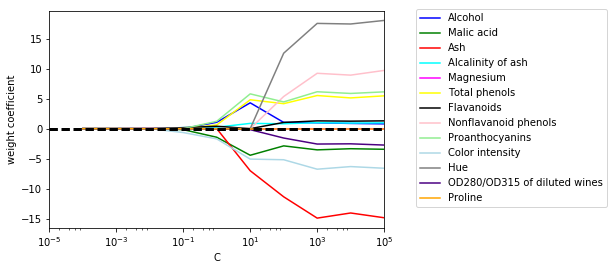

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('L1_featureselection.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

## Sequential feature selection algorithms

An alternative way to reduce the complexity of the model and avoid overfitting is **dimensionality reduction** via feature selection, which is especially useful for unregularized models. Using feature selection, we select a subset of the original features. We will now look at a classic family of feature selection algowithms.

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial *d-dimensional* feature space to a *k-dimensional* feature subspace where k < d. The motivation behind feature selection algorithms is to automatically selecta subset of features that are most relevant to the problem to improve computational efficiency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization.

A classical geature selection algorithm is **Sequential Backward Elimination**, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve uupon computational efficiency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.

The idea behind the SBE algorithm is quite simple: SBE sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be reomved at each stage, we need to define the criterion function $J$ that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier after and before the removal of a particular feature. Then the feature to be removed at each stage can be defined as the feature that maximizes this criterion; or, in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. 

In [32]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

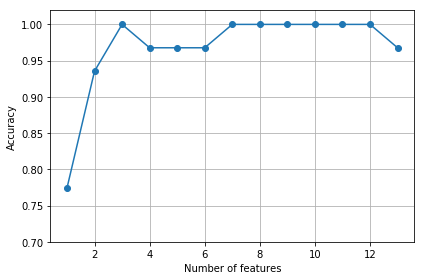

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('feature_selection.png', dpi=300)
plt.show()

In [34]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index([u'Alcohol', u'Malic acid', u'OD280/OD315 of diluted wines'], dtype='object')


In [35]:
k4 = list(sbs.subsets_[9])
print(df_wine.columns[1:][k4])

Index([u'Alcohol', u'Malic acid', u'Ash', u'OD280/OD315 of diluted wines'], dtype='object')


In [36]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.967741935483871)
('Test accuracy:', 0.96296296296296291)


In [37]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

('Training accuracy:', 0.95161290322580649)
('Test accuracy:', 0.92592592592592593)


## Recursive feature elimination for estimators that assign weights

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))


Features sorted by their rank:
[(1.0, 'NOX'), (2.0, 'RM'), (3.0, 'CHAS'), (4.0, 'PTRATIO'), (5.0, 'DIS'), (6.0, 'LSTAT'), (7.0, 'RAD'), (8.0, 'CRIM'), (9.0, 'INDUS'), (10.0, 'ZN'), (11.0, 'TAX'), (12.0, 'B'), (13.0, 'AGE')]


# Handling text features

Another common need in feature engineering is to convert text to a set of representative
numerical values. For example, most automatic mining of social media data relies
on some form of encoding the text as numbers. One of the simplest methods of
encoding data is by word counts: you take each snippet of text, count the occurrences
of each word within it, and put the results in a table.
For example, consider the following set of three phrases:

In [39]:
sample = ['problem of evil',
'evil queen',
'horizon problem']

For a vectorization of this data based on word count, we could construct a column
representing the word “problem,” the word “evil,” the word “horizon,” and so on.
While doing this by hand would be possible, we can avoid the tedium by using Scikit-
Learn’s CountVectorizer:

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
print(X)

  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (1, 4)	1
  (1, 0)	1
  (2, 1)	1
  (2, 3)	1


The result is a sparse matrix recording the number of times each word appears; it is
easier to inspect if we convert this to a DataFrame with labeled columns:

In [41]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

There are some issues with this approach, however: the raw word counts lead to features
that put too much weight on words that appear very frequently, and this can be
suboptimal in some classification algorithms. One approach to fix this is known as
term frequency–inverse document frequency (TF–IDF), which weights the word counts
by a measure of how often they appear in the documents. The syntax for computing
these features is similar to the previous example:

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

In [43]:
vec = TfidfVectorizer(stop_words='english')
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon   problem     queen
0  0.707107  0.000000  0.707107  0.000000
1  0.605349  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.605349  0.000000

In [ ]:
target = df['MERCHNT_IND']
train_test_indicator = df['TRAIN_TEST']

features_to_standardize = df.drop(['MERCHNT_IND', 'TRAIN_TEST'], axis=1)



standardized_features_df = pd.DataFrame(standardized_features, columns=features_to_standardize.columns, index=df.index)

df_scaled = pd.concat([target, train_test_indicator, standardized_features_df], axis=1)

print("Data after standardization:")
print(df_scaled.head())

In [ ]:
sns.pairplot(yX_select, hue='MERCHNT_IND')
plt.suptitle('Pairplot of Features', size=18, fontweight="bold")
plt.savefig('img/pairplot.png')
#plt.close()

In [ ]:
print("Random Forest")

# First Try
param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4, 8]
}

# Best Record
param_grid = {
    'n_estimators': [150],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Create a custom scorer for ROC AUC
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV with the AUC scorer
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    scoring=auc_scorer)

# Train using the SMOTE-adjusted training data
grid.fit(X_train_smote, y_train_smote)

# Retrieve the best estimator and its parameters
best_rf = grid.best_estimator_
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Best AUC score: {grid.best_score_}")
results.append(('Random Forest', grid.best_params_, grid.best_score_))

In [ ]:
print("Gradient Boosting")
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}
# Best Record
param_grid = {
    'n_estimators': [400],
    'learning_rate': [0.3],
    'max_depth': [13],
    'min_samples_split': [6],
    'min_samples_leaf': [3]
}

# Create a custom scorer for ROC AUC
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV with the AUC scorer
grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    scoring=auc_scorer)

# Train using the SMOTE-adjusted training data
grid.fit(X_train_smote, y_train_smote)

# Retrieve the best estimator and its parameters
best_gb = grid.best_estimator_
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Best AUC score: {grid.best_score_}")
results.append(('Gradient Boosting', grid.best_params_, grid.best_score_))


In [ ]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model Name', 'AUC Train', 'AUC Test'])

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Training the model
    model.fit(X_train, y_train)

    # Calculate AUC for training data
    train_probabilities = model.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, train_probabilities)

    # Calculate AUC for testing data
    test_probabilities = model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, test_probabilities)

    # Record the results
    results_df.loc[len(results_df)] = [model_name, round(auc_train, 4), round(auc_test, 4)]

    # Plot ROC curve for test data
    fpr, tpr, _ = roc_curve(y_test, test_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.savefig("img/"+model_name)

# Evaluate each model
evaluate_model(best_rf, X_train_smote, y_train_smote, X_test, y_test, "Random Forest")
evaluate_model(best_gb, X_train_smote, y_train_smote, X_test, y_test, "Gradient Boosting")

# Display final results DataFrame
print(results_df)